## 1. Sales of shampoo over a three year – Time series Analysis

### 1. Đọc dữ liệu

In [1]:
shampoo = read.csv("Du lieu cung cap/sales-of-shampoo-over-a-three-year.csv")

### 2. Xem các thông tin chung

In [2]:
head(shampoo)

,Month,Sales.of.shampoo.over.a.three.year.period
,<chr>,<dbl>
1,"Friday, January 1, 2016",266.0
2,"Monday, February 1, 2016",145.9
3,"Tuesday, March 1, 2016",183.1
4,"Friday, April 1, 2016",119.3
5,"Sunday, May 1, 2016",180.3
6,"Wednesday, June 1, 2016",168.5


In [3]:
tail(shampoo)

,Month,Sales.of.shampoo.over.a.three.year.period
,<chr>,<dbl>
31,"Sunday, July 1, 2018",575.5
32,"Wednesday, August 1, 2018",407.6
33,"Saturday, September 1, 2018",682.0
34,"Monday, October 1, 2018",475.3
35,"Thursday, November 1, 2018",581.3
36,"Saturday, December 1, 2018",646.9


In [4]:
print(paste("Number of rows:", nrow(shampoo)))
print(paste("Number of cols:", ncol(shampoo)))

[1] "Number of rows: 36"
[1] "Number of cols: 2"


In [5]:
str(shampoo)

'data.frame':	36 obs. of  2 variables:
 $ Month                                    : chr  "Friday, January 1, 2016" "Monday, February 1, 2016" "Tuesday, March 1, 2016" "Friday, April 1, 2016" ...
 $ Sales.of.shampoo.over.a.three.year.period: num  266 146 183 119 180 ...


In [6]:
summary(shampoo)

    Month           Sales.of.shampoo.over.a.three.year.period
 Length:36          Min.   :119.3                            
 Class :character   1st Qu.:192.4                            
 Mode  :character   Median :280.1                            
                    Mean   :312.6                            
                    3rd Qu.:411.1                            
                    Max.   :682.0                            

### 3. Chuyển dữ liệu này thành Time Series object => in Time Series object.

In [7]:
print("Shampoo time series:")
shampoo.timeseries = ts(shampoo$Sales.of.shampoo.over.a.three.year.period, start=c(2016,1), frequency=12)
shampoo.timeseries

[1] "Shampoo time series:"


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2016,266.0,145.9,183.1,119.3,180.3,168.5,231.8,224.5,192.8,122.9,336.5,185.9
2017,194.3,149.5,210.1,273.3,191.4,287.0,226.0,303.6,289.9,421.6,264.5,342.3
2018,339.7,440.4,315.9,439.3,401.3,437.4,575.5,407.6,682.0,475.3,581.3,646.9


### 4. Vẽ Time Series object vừa tạo. 

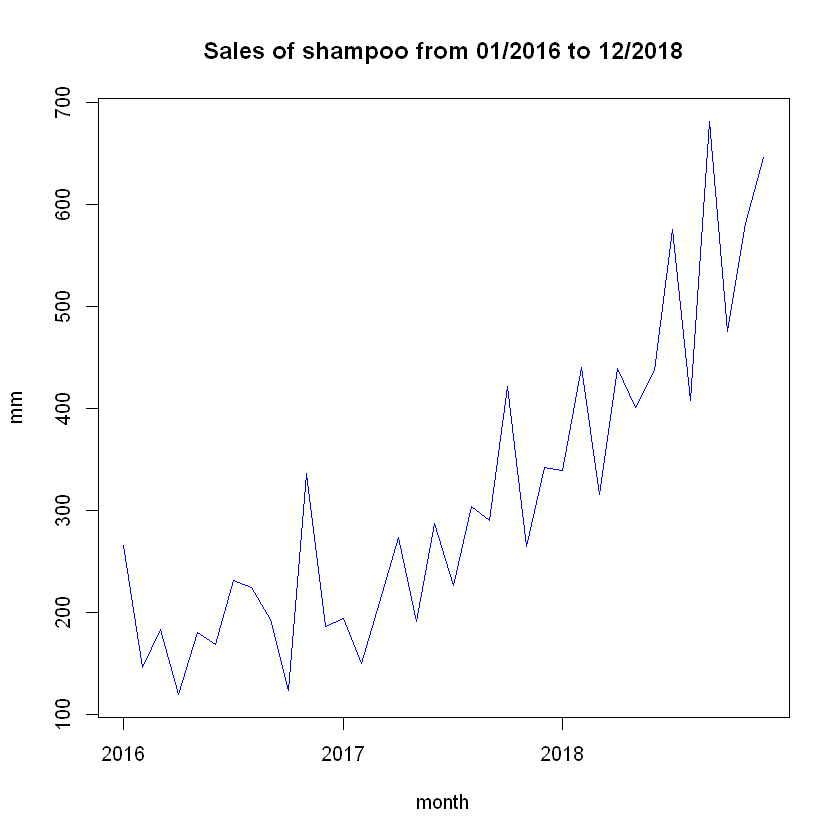

In [21]:
plot.ts(shampoo.timeseries, main="Sales of shampoo from 01/2016 to 12/2018", 
       ylab="mm",xlab="month",col="blue",xaxt="n")
axis(1,at=2016:2018,labels=c(2016:2018))

Nhận xét
* Có thể thấy từ biểu đồ này một chu kỳ mang tính mùa và xu hướng năm
* Từ năm 2017, số lượng tre bán được có xu hướng tăng

### 5. Thực hiện việc decompostition, nhận xét.

In [9]:
comp = decompose(shampoo.timeseries)
comp$x

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2016,266.0,145.9,183.1,119.3,180.3,168.5,231.8,224.5,192.8,122.9,336.5,185.9
2017,194.3,149.5,210.1,273.3,191.4,287.0,226.0,303.6,289.9,421.6,264.5,342.3
2018,339.7,440.4,315.9,439.3,401.3,437.4,575.5,407.6,682.0,475.3,581.3,646.9


In [10]:
comp$seasonal

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2016,-19.193924,-2.218924,-48.175174,27.591493,-44.800174,6.345660,2.951910,30.431076,-1.171007,20.295660,37.274826,-9.331424
2017,-19.193924,-2.218924,-48.175174,27.591493,-44.800174,6.345660,2.951910,30.431076,-1.171007,20.295660,37.274826,-9.331424
2018,-19.193924,-2.218924,-48.175174,27.591493,-44.800174,6.345660,2.951910,30.431076,-1.171007,20.295660,37.274826,-9.331424


Nhận xét: Trong seasonal, yếu tố seasonal cao nhất vào tháng 11 và thấp nhất vào tháng 3. Như vậy tháng có nhiều tre được bán nhất là tháng 11, ít nhất là tháng 3

In [11]:
comp$trend

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2016,NA,NA,NA,NA,NA,NA,193.4708,190.6333,191.9083,199.4500,206.3292,211.7292
2017,216.4250,219.4792,226.8208,243.3125,252.7583,256.2750,268.8500,287.0292,303.5583,314.8833,330.5458,345.5583
2018,366.3875,385.2833,405.9542,424.5292,439.9667,465.8583,NA,NA,NA,NA,NA,NA


Nhận xét: Trong trend, ta nhận thấy số lượng tre bán được tăng dần qua các năm

In [12]:
comp$random

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2016,NA,NA,NA,NA,NA,NA,35.377257,3.435590,2.062674,-96.845660,92.896007,-16.497743
2017,-2.931076,-67.760243,31.454340,2.396007,-16.558160,24.379340,-45.801910,-13.860243,-12.487326,86.421007,-103.320660,6.073090
2018,-7.493576,57.335590,-41.878993,-12.820660,6.133507,-34.803993,NA,NA,NA,NA,NA,NA


Nhận xét: Ta nhận thấy ít biến động nhất là vào tháng 1, còn biến động nhiều nhất là vào tháng 11

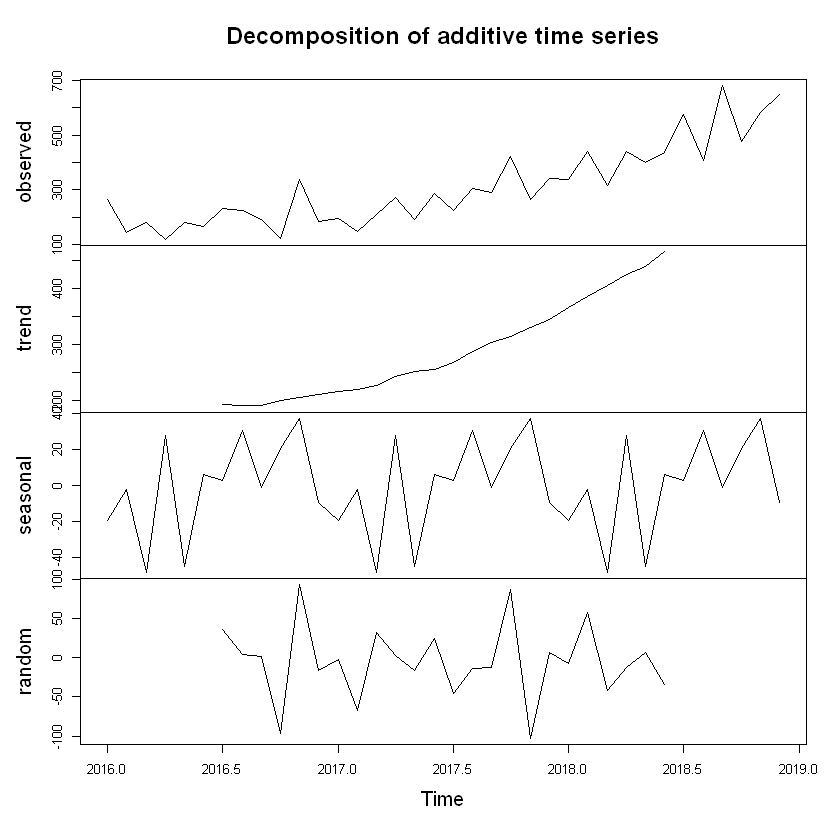

In [13]:
plot(comp)

Nhận xét: Có thể thấy từ biểu đồ này một chu kỳ mang tính mùa và xu hướng năm

### 6. Thực hiện việc dự báo và vẽ biểu đồ so sánh với thực tiễn. 

In [14]:
shampoo.timeseries.forecasts = HoltWinters(log(shampoo.timeseries))
print(shampoo.timeseries.forecasts)

Holt-Winters exponential smoothing with trend and additive seasonal component.

Call:
HoltWinters(x = log(shampoo.timeseries))

Smoothing parameters:
 alpha: 0.05066872
 beta : 1
 gamma: 0.568692

Coefficients:
           [,1]
a    6.36782058
b    0.03110626
s1  -0.01458845
s2  -0.03863011
s3  -0.13592566
s4   0.10722877
s5  -0.15372675
s6   0.02622189
s7   0.09695719
s8  -0.05735946
s9   0.16155766
s10 -0.08197106
s11  0.07184074
s12  0.04843316


In [15]:
shampoo.timeseries.forecasts$SSE
sqrt(shampoo.timeseries.forecasts$SSE/length(shampoo))
mean(log(shampoo.timeseries))
sd(log(shampoo.timeseries))

[1] 2.153

[1] 1.037545

[1] 5.638671

[1] 0.4680194

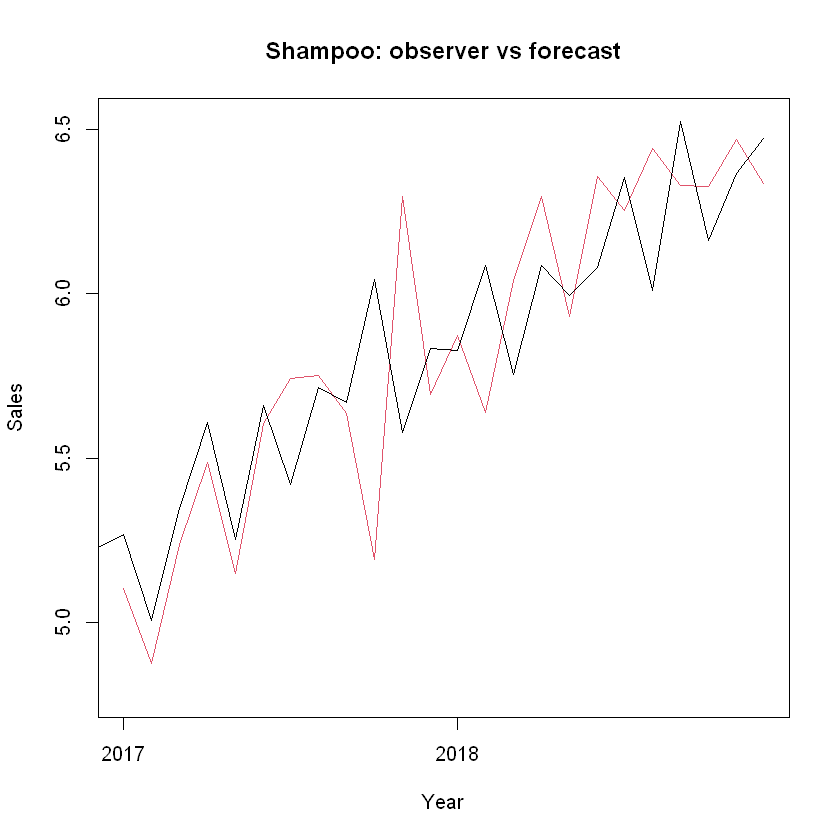

In [22]:
plot(shampoo.timeseries.forecasts, main="Shampoo: observer vs forecast",
     xlab="Year",ylab="Sales",xaxt="n")
axis(1,at=2016:2018,labels=c(2016:2018))

### 7. Dự đoán lượng sales cho 6 tháng tiếp theo.

In [17]:
shampoo.timeseries.forecasts2 = forecast:::forecast.HoltWinters(shampoo.timeseries.forecasts, h=6)
print("Next 6 months:")
print(shampoo.timeseries.forecasts2)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



[1] "Next 6 months:"
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2019       6.384338 5.992252 6.776424 5.784695 6.983982
Feb 2019       6.391403 5.997309 6.785497 5.788688 6.994118
Mar 2019       6.325214 5.926639 6.723789 5.715646 6.934782
Apr 2019       6.599474 6.193055 7.005894 5.977909 7.221040
May 2019       6.369625 5.951243 6.788008 5.729764 7.009486
Jun 2019       6.580680 6.145649 7.015711 5.915357 7.246003


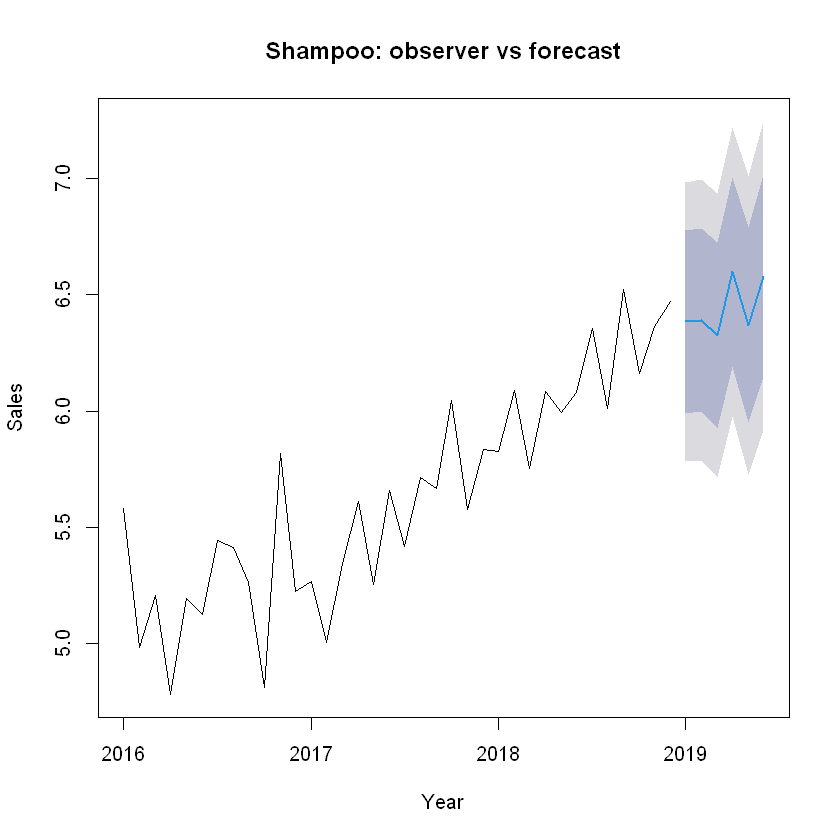

In [25]:
plot(shampoo.timeseries.forecasts2, main="Shampoo: observer vs forecast",
     xlab="Year",ylab="Sales",xaxt="n")
axis(1,at=2016.0:2019.5,labels=c(2016:2019))